In [7]:
cd ..

/content/drive/My Drive/DSP_Project


In [5]:
!pip install librosa

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
filename='UrbanSound8K/dog_bark.wav'

In [9]:
import IPython.display as ipd
import librosa
import librosa.display

In [10]:
!dir

UrbanSound8K


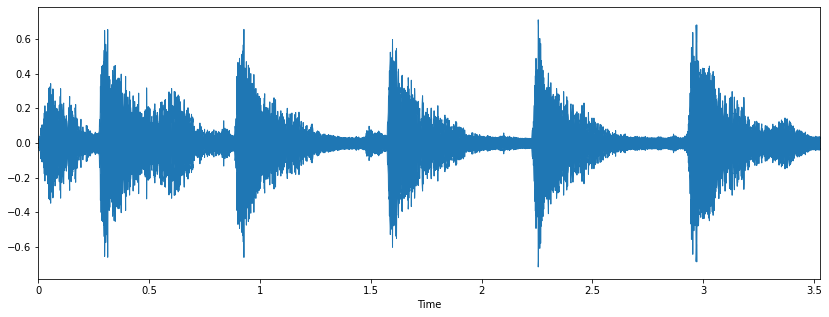

In [11]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [13]:
sample_rate

22050

In [14]:
data

array([0.01388212, 0.02055149, 0.01845404, ..., 0.01507499, 0.01250785,
       0.01730848], dtype=float32)

In [15]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [16]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
street_music        1000
jackhammer          1000
engine_idling       1000
air_conditioner     1000
children_playing    1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [17]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/4201-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [18]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.07455782 -0.07427226
  0.        ]


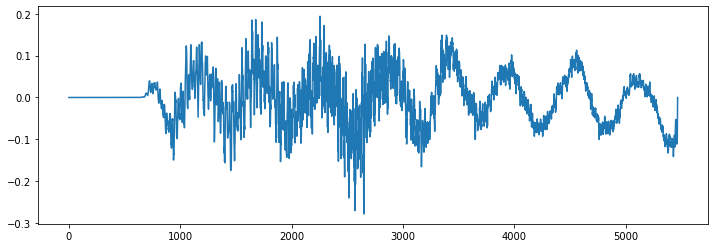

In [19]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)


# **Observation**
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [20]:
from scipy.io import wavfile as wav

In [21]:
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [22]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2357, -2032],
       [-2327, -2161],
       [-2596, -2295]], dtype=int16)

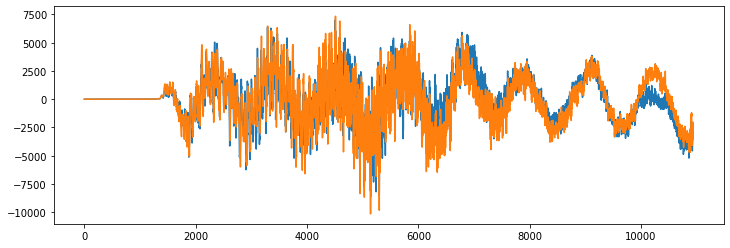

In [23]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# **Extract Features**
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [24]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 11)


In [25]:
mfccs

array([[-5.27520935e+02, -2.93282715e+02, -1.90003784e+02,
        -1.52674576e+02, -1.39339722e+02, -1.42487640e+02,
        -1.60361038e+02, -1.89350449e+02, -2.17289413e+02,
        -2.33016800e+02, -2.27845825e+02],
       [ 1.31533112e+02,  1.35372223e+02,  1.25179581e+02,
         1.03865891e+02,  8.84239883e+01,  9.06229477e+01,
         9.16858063e+01,  8.85056534e+01,  8.18104935e+01,
         8.21154251e+01,  8.09827423e+01],
       [ 1.98278122e+01,  1.10411358e+01, -1.48624408e+00,
        -1.43112316e+01, -1.40572071e+01, -7.05646813e-01,
         2.02099919e+00,  4.87855196e+00,  2.10169244e+00,
         8.11671257e+00,  4.75461578e+00],
       [-1.69313502e+00, -5.06422901e+00, -2.36067176e+00,
         5.87041378e+00,  1.15253992e+01,  1.14624043e+01,
         1.19005833e+01,  1.36548061e+01,  1.77582073e+01,
         1.60753136e+01,  6.77493668e+00],
       [-8.36894417e+00, -1.89570522e+01, -2.23668709e+01,
        -3.20293503e+01, -4.68006134e+01, -5.48897552e+01,
  

In [26]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [27]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [28]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [21:09,  2.73it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [48:37,  4.49it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [48:38,  4.86it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [50:49,  2.86it/s]


In [29]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [30]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [31]:
X.shape

(8732, 40)

In [32]:
y=np.array(pd.get_dummies(y))

In [33]:
y.shape

(8732, 10)

In [34]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233369e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652115e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321606e+00]], dtype=float32)

In [36]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
X_train.shape

(6985, 40)

In [38]:
X_test.shape

(1747, 40)

In [39]:
y_train.shape

(6985, 10)

In [40]:
y_test.shape

(1747, 10)


# **Model Creation**

In [41]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [43]:
### No of classes
num_labels=y.shape[1]

In [44]:
Dense()

TypeError: ignored

In [45]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [47]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [48]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 12.9760 - accuracy: 0.1204
Epoch 00001: val_loss improved from inf to 2.29579, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 5s 7ms/step - loss: 12.5488 - accuracy: 0.1200 - val_loss: 2.2958 - val_accuracy: 0.1070
Epoch 2/100
215/219 [============================>.] - ETA: 0s - loss: 2.5653 - accuracy: 0.1187
Epoch 00002: val_loss improved from 2.29579 to 2.28296, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.5626 - accuracy: 0.1188 - val_loss: 2.2830 - val_accuracy: 0.1070
Epoch 3/100
212/219 [============================>.] - ETA: 0s - loss: 2.3526 - accuracy: 0.1184
Epoch 00003: val_loss improved from 2.28296 to 2.27289, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 7ms/step - loss: 2.3515 - accuracy: 0.1173 - val_loss: 2.2729 - val_ac

In [49]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7515740990638733


In [53]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)


predict_x=model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)

In [54]:
classes_x

array([9])